# Wahlomat - Datenanalyse

In [7]:
# importe 
import numpy as np 
import matplotlib.pyplot as plt 
# tiagos graph-tool is best graph-tool  <3
from graph_tool.all import *
import graph_tool.inference as gti


In [8]:
def calc_euklidian_dist(list1, list2): 
    if len(list1) != len(list2): 
        print("ungleich lange listen, exiting ...")
        return False 
    tmp = 0 
    for i in range(len(list1)): 
        tmp +=  (list1[i] - list2[i]) **2 
    return np.sqrt(tmp)


In [9]:
# data (encoded: 1=yes, 2=maybe, 3=no)  
SPD     = [1,3,3,1,3,3,2,3,1,1,1,1,1,1,1,1,2,1,3,1,3,3,1,1,3,3,3,3,1,3,3,1,1,1,3,3,1,1]
CDU     = [1,1,3,3,3,3,1,1,1,1,1,3,2,1,3,3,1,3,1,1,1,3,1,1,3,1,1,1,1,1,1,1,3,1,1,1,2,3]
gruen   = [3,3,1,1,3,1,2,3,1,1,3,1,3,3,2,1,1,3,3,1,1,3,2,1,1,3,3,3,1,3,3,2,1,3,3,3,1,1]
links   = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,1,1,3,1,3,1,3,1,2,3,3,3,1,3,3,3,1,3,3,3,1,1]
fdp     = [1,1,3,3,1,3,1,3,3,1,1,3,3,1,3,3,3,3,1,3,1,1,1,1,3,3,1,1,3,1,3,1,3,1,1,1,3,1]
afd     = [1,1,3,3,2,3,1,1,3,1,3,3,1,1,3,3,3,3,1,1,3,1,1,1,3,3,1,1,1,1,1,2,3,1,2,1,3,2]
biw     = [1,1,3,1,3,3,1,1,1,1,3,3,1,1,1,3,3,3,1,3,2,3,1,1,3,3,1,3,3,1,3,1,3,1,1,2,3,1]
partei  = [3,1,3,1,1,1,3,3,1,1,3,1,1,3,1,1,1,1,1,3,1,1,3,1,1,3,3,3,1,3,1,1,1,3,3,3,3,1]
piraten = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,3,1,3,1,3,1,3,1,3,3,3,3,1,3,3,3,1,3,3,3,2,1]
bge     = [3,3,3,1,3,1,1,3,1,1,2,1,1,2,3,1,1,1,3,2,3,1,1,1,3,3,3,3,1,3,1,3,3,3,3,3,1,1]
rechts  = [1,1,3,1,3,3,1,3,1,3,1,3,1,1,1,3,3,1,1,1,3,1,1,3,1,1,3,1,1,1,2,3,1,3,3,1,1,1]
frei    = [3,1,1,3,2,3,1,1,1,3,3,3,3,1,2,2,3,1,1,3,1,1,1,1,3,2,3,3,1,1,1,1,1,1,2,1,3,3]
MenWelt = [3,3,3,1,3,1,2,3,1,2,3,1,1,1,3,1,1,1,3,1,2,1,3,1,3,2,3,3,1,2,3,2,2,3,3,3,3,1]
human   = [2,2,3,1,1,1,1,3,1,1,2,3,1,1,3,2,1,1,1,1,1,2,3,1,3,2,3,2,1,2,1,1,3,1,3,1,2,1]
v3      = [3,3,1,1,3,1,1,3,1,1,3,1,1,3,3,1,1,1,1,1,1,1,2,1,1,3,3,1,1,3,1,3,1,3,3,3,3,1]
WIR     = [3,3,1,1,3,1,1,3,1,1,3,1,1,2,1,1,1,1,3,1,1,1,3,1,3,3,3,1,1,3,1,1,1,1,3,3,1,1]
parteinames =  ["SPD","CDU","gruen","links","fdp","afd","biw","partei","piraten","bge","rechts","frei","MenWelt","human","v3","WIR"]

list_of_lists       = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
N_analyzed_parties  = len(list_of_lists)
print("N_analyzed_parties", N_analyzed_parties)
N_fragen = 38

# calculate euklidian distances:
euklidian_distances = np.zeros((N_analyzed_parties, N_analyzed_parties), dtype=float)
for i in range( N_analyzed_parties ):# [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
	for j in range( N_analyzed_parties ):  # [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
		euklidian_distances[i][j] = calc_euklidian_dist( list_of_lists[i], list_of_lists[j] )

#overlap = np.zeros(( 7 , 38 ), dtype="int")
#data_in_lists = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
#for qq in range(7):#len (data_lists)):#[SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
#	for ww in range(38):#len(data_lists[qq])):
		#print(round(len(list( set( parteienliste[qq]).intersection(set( parteienliste[ww])) ))/len(SPD),4))
#		data[qq][ww] = data_in_lists[qq][ww]


for partei_list in list_of_lists:
	for antwort in range(N_fragen) :
		#print("partei_list[antwort]", partei_list[antwort])
		tmp = [ "J","V","N" ][(partei_list[antwort])-1]
		#print(type(antwort))
		counter = int(antwort)   + 1 
		partei_list[antwort] = "Q"+str(antwort).zfill(2) + "A" +  tmp

        
        


N_analyzed_parties 16


In [10]:
SPD

['Q00AJ',
 'Q01AN',
 'Q02AN',
 'Q03AJ',
 'Q04AN',
 'Q05AN',
 'Q06AV',
 'Q07AN',
 'Q08AJ',
 'Q09AJ',
 'Q10AJ',
 'Q11AJ',
 'Q12AJ',
 'Q13AJ',
 'Q14AJ',
 'Q15AJ',
 'Q16AV',
 'Q17AJ',
 'Q18AN',
 'Q19AJ',
 'Q20AN',
 'Q21AN',
 'Q22AJ',
 'Q23AJ',
 'Q24AN',
 'Q25AN',
 'Q26AN',
 'Q27AN',
 'Q28AJ',
 'Q29AN',
 'Q30AN',
 'Q31AJ',
 'Q32AJ',
 'Q33AJ',
 'Q34AN',
 'Q35AN',
 'Q36AJ',
 'Q37AJ']

In [11]:
print("beispielvergleich: spd und cdu")
print("len(list( set(spd).intersection(set(cdu)) ))")
print(len(list( set(SPD).intersection(set(CDU)) )))


beispielvergleich: spd und cdu
len(list( set(spd).intersection(set(cdu)) ))
16


In [13]:
erg = np.zeros((16,16), dtype=float)
#print("erg", erg)
parteienliste = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
for qq in range(len ([SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
	for ww in range(len ([SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
		#print(round(len(list( set( parteienliste[qq]).intersection(set( parteienliste[ww])) ))/len(SPD),4))
		erg[qq][ww] = round(len(list( set( parteienliste[qq]).intersection(set( parteienliste[ww])) ))/len(SPD),4)
print("erg", erg[1])
print("euklidian_distances", euklidian_distances[1])

erg [0.4211 1.     0.2632 0.2105 0.6842 0.6842 0.6316 0.2895 0.2368 0.3421
 0.5    0.5263 0.2632 0.5263 0.3421 0.3684]
euklidian_distances [ 8.71779789  0.          9.69535971 10.53565375  6.4807407   5.47722558
  6.63324958 10.09950494 10.63014581  9.21954446  8.18535277  7.14142843
  9.21954446  6.70820393  9.53939201  9.32737905]


In [14]:
diagramm = graph_tool.Graph()
diagramm.set_directed(False)
vertex_labels_by_party = diagramm.new_vertex_property("string")          # doubles
couplings = diagramm.new_edge_property("float")

vertices = []
for xx in parteinames: 
    vertices.append(diagramm.add_vertex())


for qq in range(len(parteinames)): 
    vertex_labels_by_party[vertices[qq]] = parteinames[qq]


In [15]:
couplings = diagramm.new_edge_property("float")
couplings_re = diagramm.new_edge_property("float")
couplings_eukl_38 = diagramm.new_edge_property("float")
couplings_text = diagramm.new_edge_property("string")

#for vertex in diagramm.vertices(): 
    #print(vertex_labels_by_party[vertex])
    #rint("ende")


In [18]:
edge_descriptors = np.zeros((16,16), dtype=np.dtype(object) )
print("test edge_descriptors [1][1] ", edge_descriptors[1][1])
minerg = np.amin(erg)
for vertex1 in diagramm.vertices(): 
    for vertex2 in diagramm.vertices(): 
        if vertex1 != vertex2: 
            index1 = parteinames.index(vertex_labels_by_party[vertex1])
            index2 = parteinames.index(vertex_labels_by_party[vertex2])
            if  erg[index1][index2] > 0.5:
                a = diagramm.add_edge(vertex1, vertex2)
                edge_descriptors[ index1 ][ index2 ] = a
                couplings[a] = erg[index1][index2]
                couplings_re[a] = erg[index1][index2] - minerg
                couplings_text[a] = str(round(100*erg[index1][index2],1))+"%"
                couplings_eukl_38[a] = euklidian_distances[index1][index2]
            #print("edge_descriptors[ index1 ][ index2 ]", edge_descriptors[ index1 ][ index2 ])


test edge_descriptors [1][1]  0


In [19]:
#for qq in range(16):
#    for ww in range(16):
#        tmpedge =  edge_descriptors[qq][ww]
#        print("tmpedge", tmpedge, "erg[qq][ww]=" , erg[qq][ww])
#        couplings[ tmpedge ] = erg[qq][ww] 

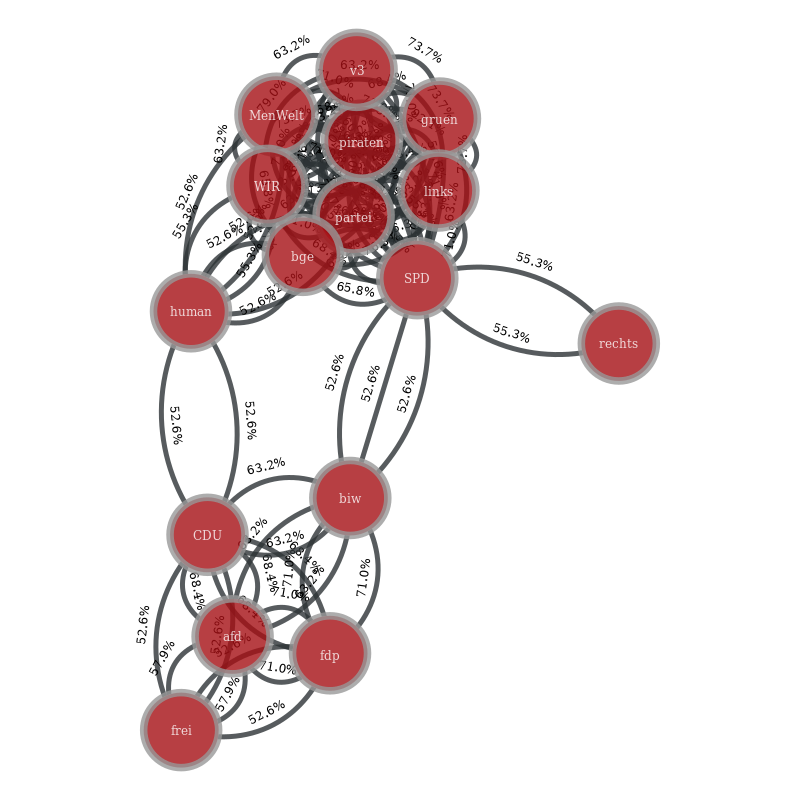

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f367f169cc0, at 0x7f367f147278>

In [20]:

#for beta_s in [0.8]: # [0,0.1,0.2,0.5,0.8,0.9,1]:
#    state = gti.minimize_nested_blockmodel_dl(powernet, deg_corr=True)
#    gtd.draw_hierarchy(state, output="powernet_nested_mdl.pdf")
#    gtd.draw_hierarchy(state,beta=beta_s, output_size=(400,400) )

positions = sfdp_layout(diagramm, eweight=couplings)
graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions,
            edge_text=couplings_text,
            )

In [ ]:
positions = sfdp_layout(diagramm, eweight=couplings_eukl_38)
graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings_eukl_38),
            pos=positions,
            edge_text=couplings_text,
            )

In [ ]:
for beta_s in [0.8]: # [0,0.1,0.2,0.5,0.8,0.9,1]:
    state = gti.minimize_nested_blockmodel_dl(diagramm, deg_corr=True)
    draw_hierarchy(state, output="diagramm_nested_model.pdf")
    draw_hierarchy(state, output="diagramm_nested_model.png")
    draw_hierarchy(state,beta=beta_s, output_size=(800,800) , 
                   vertex_text=vertex_labels_by_party, 
                   vertex_size=100
)


In [ ]:
from matplotlib.mlab import PCA


In [ ]:
pca = PCA(np.transpose(data))

In [ ]:
a = pca.Wt
a


In [ ]:
a.size